<a href="https://colab.research.google.com/github/gone-keerthi/ChatGPT-Review-Analysis/blob/main/ChatGPT_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re

from google.colab import files
uploaded = files.upload()

Saving chatgpt_reviews.csv to chatgpt_reviews.csv


# Load DataSet

In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['chatgpt_reviews.csv']))
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


#Inspect DataSet

In [6]:
df.shape

(196727, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [8]:
df.describe()

,Ratings
count,196727.000000
mean,4.503535
std,1.083004
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


# Data Preparation
*   Data Cleaning
*   Data Formatting



In [9]:
#check for missing values
df.isnull().sum()

,0
Review Id,0
Review,6
Ratings,0
Review Date,0


In [15]:
print(df.columns)
#Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("standarized column names: ", df.columns)

Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')
standarized column names:  Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


In [16]:
df['review'] = df['review'].fillna("No Review")
print(df.isnull().sum())

review_id      0
review         0
ratings        0
review_date    0
dtype: int64


In [17]:
#check for data types
df.dtypes

,0
review_id,object
review,object
ratings,int64
review_date,object


In [22]:
# changing review_date data type
df['review_date'] = pd.to_datetime(df['review_date'])
print(df.dtypes)

review_id              object
review                 object
ratings                 int64
review_date    datetime64[ns]
dtype: object


## Sentiment Analysis
*   Calculate sentiment polarity and subjectivity using NLP techniques
*   Categorize reviews based on polarity into positive, neutral, or negative.



In [27]:
#Define Function for Sentiment
def get_sentiment(text):
  blob = TextBlob(text)
  return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

In [28]:
#Apply Sentiment Analysis
df[["polarity", "subjectivity"]] = df['review'].apply(get_sentiment)

#display the updated dataset
print(df.head())

                              review_id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              review  ratings  \
0                                               good        5   
1                                               good        5   
2                                           nice app        5   
3                                           nice, ig        5   
4  this is a great app, the bot is so accurate to...        5   

          review_date  polarity  subjectivity  
0 2024-08-23 19:30:05    0.7000      0.600000  
1 2024-08-23 19:28:18    0.7000      0.600000  
2 2024-08-23 19:22:59    0.6000      1.000000  
3 2024-08-23 19:20:50    0.6000      1.000000  
4 2024-08-23 19:20:39    0.4125      0.542949  


In [37]:
# Sentiment Categorization
def categorize(polarity_score):
  if polarity_score > 0.1:
    return "Positive"
  elif(polarity_score) < -0.1:
    return "Negative"
  else:
    return "Neutral"

In [38]:
#apply categories to sentiment
df["sentiment"] = df["polarity"].apply(categorize)

#display the resultant dataset
print(df.head())

                              review_id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              review  ratings  \
0                                               good        5   
1                                               good        5   
2                                           nice app        5   
3                                           nice, ig        5   
4  this is a great app, the bot is so accurate to...        5   

          review_date  polarity  subjectivity sentiment  
0 2024-08-23 19:30:05    0.7000      0.600000  Positive  
1 2024-08-23 19:28:18    0.7000      0.600000  Positive  
2 2024-08-23 19:22:59    0.6000      1.000000  Positive  
3 2024-08-23 19:20:50    0.6000      1.000000  Positive  
4 2024-08-23 19:20:39    0.4125      0.542949  Positive  


# Visualize Sentiment Trends


In [39]:
#Sentiment Distribution
sentiment_distribution = df['sentiment'].value_counts().reset_index()
sentiment_distribution

,sentiment,count
0,Positive,145607
1,Neutral,44816
2,Negative,6304


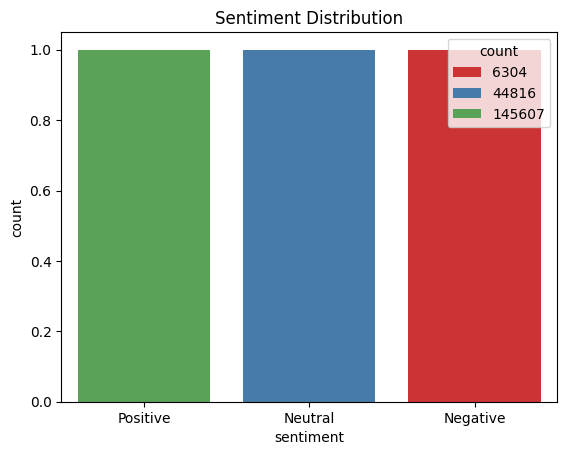

In [43]:
sns.countplot(data = sentiment_distribution, x ="sentiment", hue = "count", palette="Set1")
plt.title("Sentiment Distribution")
plt.show()

# 🔍 Observations:

*   Positive reviews dominate: ~145,607 entries.
*   Neutral reviews are also significant: ~44,816 entries.
*   Negative reviews are much fewer: ~6,304 entries.

✅ Conclusion: The majority of users express satisfaction with ChatGPT, while only a small proportion express strong criticism.

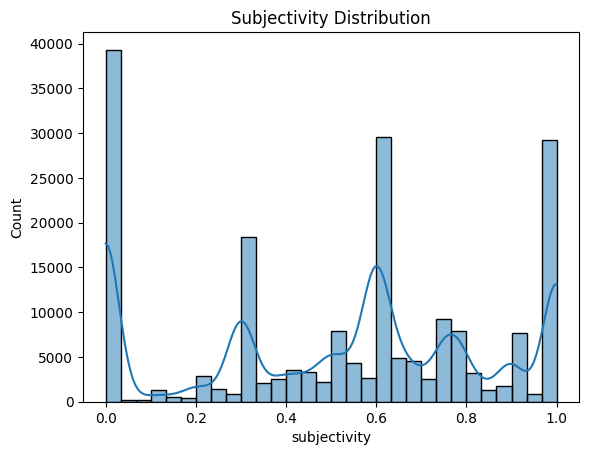

In [57]:
#subjective distribution
sns.histplot(df['subjectivity'], bins=30, kde=True)
plt.title("Subjectivity Distribution")
plt.show()

# 🔍 Observations:

Peaks at 0.0, 0.6, and 1.0, indicating three dominant review styles:

Objective (0.0): Reviews are factual or brief.

Balanced (0.6): A mix of facts and opinions.

Highly subjective (1.0): Personal feelings and emotional experiences.

✅ Conclusion: ChatGPT reviews are highly varied in tone, with many users expressing personal experiences rather than just facts.

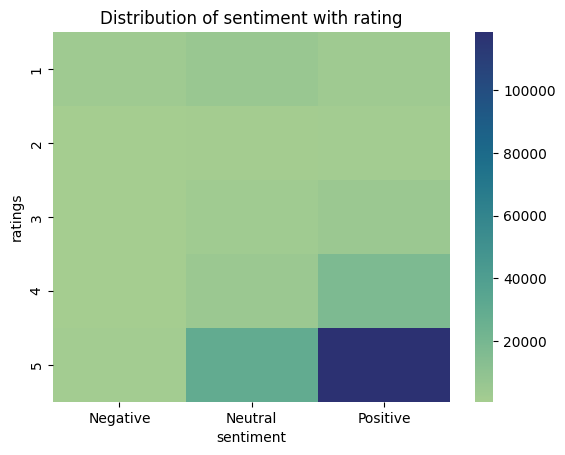

In [51]:
# Create a cross-tabulation
heatmap_data = pd.crosstab(df['ratings'], df['sentiment'])
sns.heatmap(heatmap_data, cmap="crest")
plt.title("Distribution of sentiment with rating")
plt.show()

# 🔍 Observations:
5-star ratings are strongly associated with Positive sentiment.

Lower ratings (1-2 stars) show more Neutral or Negative sentiment.

Neutral sentiment is found across all ratings, indicating mixed or unclear emotions.

✅ Conclusion: There’s a strong correlation between star ratings and detected sentiment polarity, validating the sentiment analysis accuracy.

# Text analysis

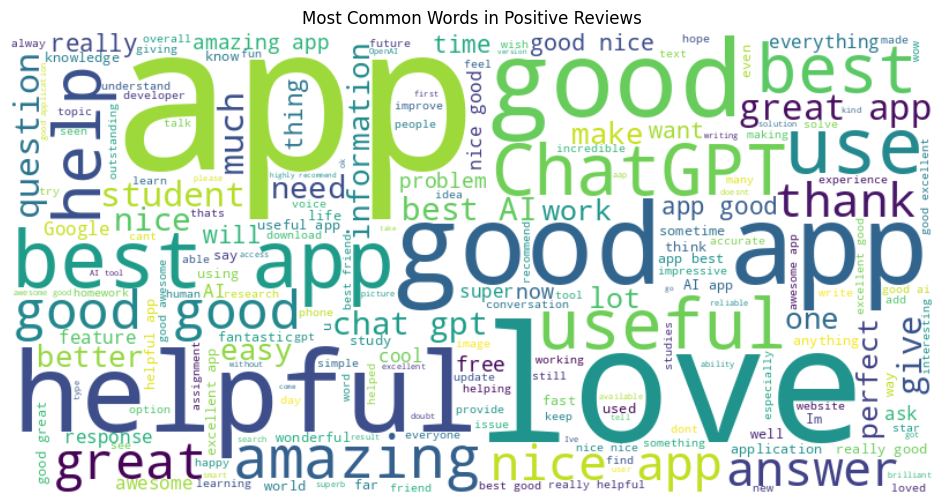

In [52]:
# Filter positive reviews
positive_reviews = df[df['sentiment'] == 'Positive']['review']

# Combine into a single string
text = " ".join(positive_reviews)

# Clean text
text = re.sub(r"http\S+|[^A-Za-z\s]", "", text)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Positive Reviews")
plt.show()


# 📌 Key Insights Summary
| Metric                    | Finding                                                    |
| ------------------------- | ---------------------------------------------------------- |
| **Total Reviews**         | Over 195,000                                               |
| **Dominant Sentiment**    | Positive (≈74%)                                            |
| **Negative Sentiment**    | Only \~3%, showing low dissatisfaction                     |
| **Subjectivity**          | Most reviews are either highly factual or highly emotional |
| **Rating-Sentiment Link** | Strong match between 5-star reviews and positive sentiment |


# 📌 Recommendations

*   Leverage Positive Reviews: Highlight strong user feedback to improve brand trust.
*   Study Neutral Reviews: These may hide dissatisfaction or confusion; analyze further.
*   Investigate Negative Reviews: Dive into common complaints to improve UX and features.
*   Refine Feature Descriptions: Address vague or misunderstood functionalities based on subjective reviews.
